## Optimal Dynamics Senior Data Analyst Interview Problem Solution by Anduamlak_Y

##Task 1: Does the Data Support the Customer's Claim? The customer who provided this data believes they are on time for delivery approximately 90 percent of the time across the network, and that even when the drivers are late for delivery, it is only by a couple hours at most.
How correct are they in this assumption? Produce a plot/visualization that would either backup the customer's claim, or provide evidence to the contrary; provide an overview of your rationale & methodology. Note that  we are considered on time if the delivery act arrival dt/tm is before the proposed end of the delivery window (DELVRY END DT, END TM ).

##Task 2: Deeper Analysis: After looking at the results of the frst plot, the customer is now interested in which destina-tion locations are giving them the most trouble and which are the most difficult to predict.
Report the bottom 5 delivery locations in terms of on time percentage with at least 10 observations, as well as their associated on-time percentages. 
Also report the 5 delivery locations with the highest standard deviation in the difference between actual delivery time and proposed end of the delivery window, also excluding locations with fewer than 10 observations. Provide the standard deviation in hours for these locations.

In [ ]:
#Importing the required libararies
import pandas as pd
import numpy as np
import seaborn as sns
import sqldf
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import datetime
importing the date and time module
from datetime import date, time
sns.set_style('darkgrid')
#plt.style.use('dark_background')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None # To omit default='warnings'

In [32]:
#Reading the CSV data
dataframe=pd.read_csv('loaddata.csv', dtype='unicode')
dataframe.head()

,LOAD_ID,BOOKING_DT,BOOKING_TM,ORIG,PKUP_ST_DT,PKUP_ST_TM,PKUP_END_DT,PKUP_END_TM,PKUP_ARRIVAL_ACT_DT,PKUP_ARRIVAL_ACT_TM,...,DEST,DLVERY_ST_DT,DLVERY_ST_TM,DLVERY_END_DT,DLVERY_END_TM,DLVERY_ARRIVAL_ACT_DT,DLVERY_ARRIVAL_ACT_TM,DLVERY_DEPARTURE_ACT_DT,DLVERY_DEPARTURE_ACT_TM,MILEAGE
0,1,20200903,1312,2075615,20200905,700,20200905,700,20200905,1015,...,1047897,20200909,1,20200910,130,20200910,102,20200910,352,1034
1,2,20201001,845,2059975,20201002,1100,20201002,1100,20201002,907,...,659549,20201005,1800,20201005,1800,20201005,1106,20201005,1107,828
2,3,20210216,1411,1041675,20210226,830,20210226,2000,20210226,1520,...,1135821,20210310,1700,20210310,1700,20210310,1532,20210310,1818,529
3,4,20200524,1000,1128953,20200526,700,20200527,2000,20200527,1334,...,992647,20200601,1100,20200601,1100,20200601,1040,20200601,1548,799
4,5,20200529,1458,1308541,20200605,1100,20200605,1100,20200605,1008,...,679813,20200608,1200,20200608,1200,20200608,1200,20200608,1200,1365


In [33]:
#Showing the total columns
dataframe.columns

Index(['LOAD_ID', 'BOOKING_DT', 'BOOKING_TM', 'ORIG', 'PKUP_ST_DT',
       'PKUP_ST_TM', 'PKUP_END_DT', 'PKUP_END_TM', 'PKUP_ARRIVAL_ACT_DT',
       'PKUP_ARRIVAL_ACT_TM', 'PKUP_DEPARTURE_ACT_DT', 'PKUP_DEPARTURE_ACT_TM',
       'DEST', 'DLVERY_ST_DT', 'DLVERY_ST_TM', 'DLVERY_END_DT',
       'DLVERY_END_TM', 'DLVERY_ARRIVAL_ACT_DT', 'DLVERY_ARRIVAL_ACT_TM',
       'DLVERY_DEPARTURE_ACT_DT', 'DLVERY_DEPARTURE_ACT_TM', 'MILEAGE'],
      dtype='object')

In [34]:
# checking out the data type for all columns
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59529 entries, 0 to 59528
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   LOAD_ID                  59529 non-null  object
 1   BOOKING_DT               59529 non-null  object
 2   BOOKING_TM               59529 non-null  object
 3   ORIG                     59529 non-null  object
 4   PKUP_ST_DT               59529 non-null  object
 5   PKUP_ST_TM               59529 non-null  object
 6   PKUP_END_DT              59529 non-null  object
 7   PKUP_END_TM              59529 non-null  object
 8   PKUP_ARRIVAL_ACT_DT      59529 non-null  object
 9   PKUP_ARRIVAL_ACT_TM      59529 non-null  object
 10  PKUP_DEPARTURE_ACT_DT    59529 non-null  object
 11  PKUP_DEPARTURE_ACT_TM    59529 non-null  object
 12  DEST                     59529 non-null  object
 13  DLVERY_ST_DT             59529 non-null  object
 14  DLVERY_ST_TM             59529 non-nul

In [35]:
#Segregation of hours and minute to format with HHMM
Booking_Minute=dataframe['BOOKING_TM'].astype(str).str[-2:]
Booking_Hour=dataframe['BOOKING_TM'].astype(str).str[:-2]
Booking_Time=Booking_Hour+':'+Booking_Minute

Pikup_Minute=dataframe['PKUP_ST_TM'].astype(str).str[-2:]
Pikup_Hour=dataframe['PKUP_ST_TM'].astype(str).str[:-2]
Pickup_Time=Pikup_Hour+':'+Pikup_Minute

Pikup_end_Hour=dataframe['PKUP_END_TM'].astype(str).str[:-2]
Pikup_end_Minute=dataframe['PKUP_END_TM'].astype(str).str[-2:]
Pickup_End_Time=Pikup_end_Hour+':'+Pikup_end_Minute

Pikup_arrival_start_Hour=dataframe['PKUP_ARRIVAL_ACT_TM'].astype(str).str[:-2]
Pikup_arrival_start_Minute=dataframe['PKUP_ARRIVAL_ACT_TM'].astype(str).str[-2:]
Pickup_arrival_start_Time=Pikup_arrival_start_Hour+':'+Pikup_arrival_start_Minute

Pikup_depar__Hour=dataframe['PKUP_DEPARTURE_ACT_TM'].astype(str).str[:-2]
Pikup_depar__Minute=dataframe['PKUP_DEPARTURE_ACT_TM'].astype(str).str[-2:]
Pickup_depart_Time=Pikup_depar__Hour+':'+Pikup_depar__Minute

delivery_start_hour=dataframe['DLVERY_ST_TM'].astype(str).str[:-2]
delivery_start_minute=dataframe['DLVERY_ST_TM'].astype(str).str[-2:]
delivery_start_time=delivery_start_hour+':'+delivery_start_minute

delivery_end_hour=dataframe['DLVERY_END_TM'].astype(str).str[:-2]
delivery_end_minute=dataframe['DLVERY_END_TM'].astype(str).str[-2:]
delivery_end_time=delivery_end_hour+':'+delivery_end_minute

delivery_arrival_hour=dataframe['DLVERY_ARRIVAL_ACT_TM'].astype(str).str[:-2]
delivery_arrival_minute=dataframe['DLVERY_ARRIVAL_ACT_TM'].astype(str).str[-2:]
delivery_arrival_time=delivery_arrival_hour+':'+delivery_arrival_minute

delivery_depar_hour=dataframe['DLVERY_DEPARTURE_ACT_TM'].astype(str).str[:-2]
delivery_depa_minute=dataframe['DLVERY_DEPARTURE_ACT_TM'].astype(str).str[-2:]
delivery_depa_time=delivery_depar_hour+':'+delivery_depa_minute

In [36]:
#Combining date and time columns and Merging columns with  date and time values

dataframe['BOOKING_DT_TM'] = pd.to_datetime(dataframe['BOOKING_DT'].astype(str) + ' ' + Booking_Time
                                           ,errors ='coerce')
dataframe['PKUP_ST_DT_Tm'] = pd.to_datetime(dataframe['PKUP_ST_DT'].astype(str) + ' ' + Pickup_Time
                                           ,errors ='coerce')
dataframe['PKUP_END_DT_TM'] = pd.to_datetime(dataframe['PKUP_END_DT'].astype(str) + ' ' + Pickup_End_Time
                                           ,errors ='coerce')
dataframe['PKUP_ARRIVAL_ACT_DT_TM'] = pd.to_datetime(dataframe['PKUP_ARRIVAL_ACT_DT'].astype(str) + ' ' 
                                                     + Pickup_arrival_start_Time,errors ='coerce')
dataframe['PKUP_DEPARTURE_ACT_DT_TM'] = pd.to_datetime(dataframe['PKUP_DEPARTURE_ACT_DT'].astype(str) + ' ' 
                                                       + Pickup_depart_Time,errors ='coerce')
dataframe['DLVERY_ST_DT_TM'] = pd.to_datetime(dataframe['DLVERY_ST_DT'].astype(str) + ' ' + delivery_start_time
                                           ,errors ='coerce')
dataframe['DLVERY_END_DT_TM'] = pd.to_datetime(dataframe['DLVERY_END_DT'].astype(str) + ' ' + delivery_end_time
                                           ,errors ='coerce')
dataframe['DLVERY_ARRIVAL_ACT_DT_TM'] = pd.to_datetime(dataframe['DLVERY_ARRIVAL_ACT_DT'].astype(str) + ' ' 
                                                       + delivery_arrival_time ,errors ='coerce')
dataframe['DLVERY_DEPARTURE_ACT_DT_TM'] = pd.to_datetime(dataframe['DLVERY_DEPARTURE_ACT_DT'].astype(str) + ' ' 
                                                         + delivery_depa_time,errors ='coerce')

In [37]:
#Droping  columns
dataframe.drop(['BOOKING_DT','BOOKING_TM','PKUP_ST_DT','PKUP_ST_TM','PKUP_END_DT','PKUP_END_TM',
                'PKUP_ARRIVAL_ACT_DT','PKUP_ARRIVAL_ACT_TM','PKUP_DEPARTURE_ACT_DT','PKUP_DEPARTURE_ACT_TM',
               'DLVERY_ST_DT','DLVERY_ST_TM','DLVERY_END_DT','DLVERY_END_TM','DLVERY_ARRIVAL_ACT_DT',
               'DLVERY_ARRIVAL_ACT_TM','DLVERY_DEPARTURE_ACT_DT','DLVERY_DEPARTURE_ACT_TM'],axis=1,inplace=True)

In [38]:
dataframe.head()

,LOAD_ID,ORIG,DEST,MILEAGE,BOOKING_DT_TM,PKUP_ST_DT_Tm,PKUP_END_DT_TM,PKUP_ARRIVAL_ACT_DT_TM,PKUP_DEPARTURE_ACT_DT_TM,DLVERY_ST_DT_TM,DLVERY_END_DT_TM,DLVERY_ARRIVAL_ACT_DT_TM,DLVERY_DEPARTURE_ACT_DT_TM
0,1,2075615,1047897,1034,2020-09-03 13:12:00,2020-09-05 07:00:00,2020-09-05 07:00:00,2020-09-05 10:15:00,2020-09-05 13:37:00,NaT,2020-09-10 01:30:00,2020-09-10 01:02:00,2020-09-10 03:52:00
1,2,2059975,659549,828,2020-10-01 08:45:00,2020-10-02 11:00:00,2020-10-02 11:00:00,2020-10-02 09:07:00,2020-10-02 10:27:00,2020-10-05 18:00:00,2020-10-05 18:00:00,2020-10-05 11:06:00,2020-10-05 11:07:00
2,3,1041675,1135821,529,2021-02-16 14:11:00,2021-02-26 08:30:00,2021-02-26 20:00:00,2021-02-26 15:20:00,2021-02-26 17:42:00,2021-03-10 17:00:00,2021-03-10 17:00:00,2021-03-10 15:32:00,2021-03-10 18:18:00
3,4,1128953,992647,799,2020-05-24 10:00:00,2020-05-26 07:00:00,2020-05-27 20:00:00,2020-05-27 13:34:00,2020-05-27 13:34:00,2020-06-01 11:00:00,2020-06-01 11:00:00,2020-06-01 10:40:00,2020-06-01 15:48:00
4,5,1308541,679813,1365,2020-05-29 14:58:00,2020-06-05 11:00:00,2020-06-05 11:00:00,2020-06-05 10:08:00,2020-06-05 12:27:00,2020-06-08 12:00:00,2020-06-08 12:00:00,2020-06-08 12:00:00,2020-06-08 12:00:00


In [9]:
#Size of our dataset
dataframe.shape

(59529, 13)

In [41]:
#Checking out null values(NAT)
dataframe.isnull().sum()

LOAD_ID                          0
ORIG                             0
DEST                             0
MILEAGE                          0
BOOKING_DT_TM                    0
PKUP_ST_DT_Tm                  545
PKUP_END_DT_TM                1240
PKUP_ARRIVAL_ACT_DT_TM         689
PKUP_DEPARTURE_ACT_DT_TM       832
DLVERY_ST_DT_TM               1555
DLVERY_END_DT_TM              4252
DLVERY_ARRIVAL_ACT_DT_TM      1139
DLVERY_DEPARTURE_ACT_DT_TM    1068
dtype: int64

In [42]:
#Droping not a time values
dataframe.dropna(inplace=True)

In [43]:
dataframe.shape

(51712, 13)

In [44]:
#Creating new dataframe with merged columns
New_df=dataframe[['LOAD_ID','BOOKING_DT_TM','PKUP_ST_DT_Tm','PKUP_END_DT_TM','DLVERY_ST_DT_TM',
                  'DLVERY_END_DT_TM','PKUP_ARRIVAL_ACT_DT_TM','PKUP_DEPARTURE_ACT_DT_TM',
                  'DLVERY_ARRIVAL_ACT_DT_TM','DLVERY_DEPARTURE_ACT_DT_TM','MILEAGE','ORIG','DEST']]
New_df.head()

,LOAD_ID,BOOKING_DT_TM,PKUP_ST_DT_Tm,PKUP_END_DT_TM,DLVERY_ST_DT_TM,DLVERY_END_DT_TM,PKUP_ARRIVAL_ACT_DT_TM,PKUP_DEPARTURE_ACT_DT_TM,DLVERY_ARRIVAL_ACT_DT_TM,DLVERY_DEPARTURE_ACT_DT_TM,MILEAGE,ORIG,DEST
1,2,2020-10-01 08:45:00,2020-10-02 11:00:00,2020-10-02 11:00:00,2020-10-05 18:00:00,2020-10-05 18:00:00,2020-10-02 09:07:00,2020-10-02 10:27:00,2020-10-05 11:06:00,2020-10-05 11:07:00,828,2059975,659549
2,3,2021-02-16 14:11:00,2021-02-26 08:30:00,2021-02-26 20:00:00,2021-03-10 17:00:00,2021-03-10 17:00:00,2021-02-26 15:20:00,2021-02-26 17:42:00,2021-03-10 15:32:00,2021-03-10 18:18:00,529,1041675,1135821
3,4,2020-05-24 10:00:00,2020-05-26 07:00:00,2020-05-27 20:00:00,2020-06-01 11:00:00,2020-06-01 11:00:00,2020-05-27 13:34:00,2020-05-27 13:34:00,2020-06-01 10:40:00,2020-06-01 15:48:00,799,1128953,992647
4,5,2020-05-29 14:58:00,2020-06-05 11:00:00,2020-06-05 11:00:00,2020-06-08 12:00:00,2020-06-08 12:00:00,2020-06-05 10:08:00,2020-06-05 12:27:00,2020-06-08 12:00:00,2020-06-08 12:00:00,1365,1308541,679813
5,6,2020-06-09 11:02:00,2020-06-12 11:00:00,2020-06-12 11:00:00,2020-06-15 12:00:00,2020-06-15 12:00:00,2020-06-11 14:46:00,2020-06-12 12:54:00,2020-06-15 11:50:00,2020-06-15 12:00:00,1365,1308541,679813


In [45]:
# We are considered on time if the delivery act arrival dt/tm is before the proposed end of the delivery window 
 #( DELVRY END DT, END TM )
New_df['Delivery_type'] = np.where((New_df['DLVERY_ARRIVAL_ACT_DT_TM'] < New_df['DLVERY_END_DT_TM']),
                                       'On_time_delivery','Not') 

In [46]:
New_df.head()

,LOAD_ID,BOOKING_DT_TM,PKUP_ST_DT_Tm,PKUP_END_DT_TM,DLVERY_ST_DT_TM,DLVERY_END_DT_TM,PKUP_ARRIVAL_ACT_DT_TM,PKUP_DEPARTURE_ACT_DT_TM,DLVERY_ARRIVAL_ACT_DT_TM,DLVERY_DEPARTURE_ACT_DT_TM,MILEAGE,ORIG,DEST,Delivery_type
1,2,2020-10-01 08:45:00,2020-10-02 11:00:00,2020-10-02 11:00:00,2020-10-05 18:00:00,2020-10-05 18:00:00,2020-10-02 09:07:00,2020-10-02 10:27:00,2020-10-05 11:06:00,2020-10-05 11:07:00,828,2059975,659549,On_time_delivery
2,3,2021-02-16 14:11:00,2021-02-26 08:30:00,2021-02-26 20:00:00,2021-03-10 17:00:00,2021-03-10 17:00:00,2021-02-26 15:20:00,2021-02-26 17:42:00,2021-03-10 15:32:00,2021-03-10 18:18:00,529,1041675,1135821,On_time_delivery
3,4,2020-05-24 10:00:00,2020-05-26 07:00:00,2020-05-27 20:00:00,2020-06-01 11:00:00,2020-06-01 11:00:00,2020-05-27 13:34:00,2020-05-27 13:34:00,2020-06-01 10:40:00,2020-06-01 15:48:00,799,1128953,992647,On_time_delivery
4,5,2020-05-29 14:58:00,2020-06-05 11:00:00,2020-06-05 11:00:00,2020-06-08 12:00:00,2020-06-08 12:00:00,2020-06-05 10:08:00,2020-06-05 12:27:00,2020-06-08 12:00:00,2020-06-08 12:00:00,1365,1308541,679813,Not
5,6,2020-06-09 11:02:00,2020-06-12 11:00:00,2020-06-12 11:00:00,2020-06-15 12:00:00,2020-06-15 12:00:00,2020-06-11 14:46:00,2020-06-12 12:54:00,2020-06-15 11:50:00,2020-06-15 12:00:00,1365,1308541,679813,On_time_delivery


In [16]:
#Counting on time delivery with those not delivered with the proposed time
New_df['Delivery_type'].value_counts()

On_time_delivery    37833
Not                 13879
Name: Delivery_type, dtype: int64

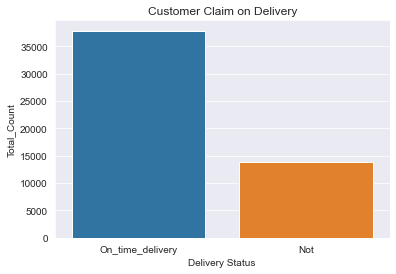

In [17]:
sns.countplot(New_df['Delivery_type'])
plt.title('Customer Claim on Delivery')
plt.xlabel('Delivery Status')
plt.ylabel('Total_Count')
plt.show()

In [49]:
#Answer for Question 1: I belive that 73.16 % for on time delivery so that the customer claim assumption is wrong
round(100 * New_df['Delivery_type'].value_counts() / len(New_df['Delivery_type']),2)

On_time_delivery    73.16
Not                 26.84
Name: Delivery_type, dtype: float64

In [19]:
# Question 2. In which destination locations are giving them the most trouble and which are the most difficult to predict.
#     Report the bottom 5 delivery locations in terms of on time percentage with at least 10 observations, 
#     as well as their associated on-time percentages.

In [48]:
#Counting the number of observation for each delivery location
import sqldf
Observation ="""
                select DEST as delivery_location,
                 count(DEST) as Observation_Count ,
                 Delivery_type
                 from New_df
                 group by DEST,Delivery_type
                 having count(DEST)>10 
                 order by DEST desc"""
observation_df=sqldf.run(Observation)
observation_df.sort_values('delivery_location',ascending=False)

,delivery_location,Observation_Count,Delivery_type
0,979829,11,On_time_delivery
1,977755,15,On_time_delivery
2,973437,21,Not
3,973437,22,On_time_delivery
4,973029,32,On_time_delivery
...,...,...,...
512,1015257,12,Not
513,1015257,12,On_time_delivery
514,1012707,24,Not
515,1012707,29,On_time_delivery


In [51]:
#Calculating the percenatge of each observation count
#observation_df['percentage_lambda'] = 100* observation_df.groupby(['delivery_location'])['Observation_Count'].transform(lambda x: x/x.sum())
observation_df['Percentage(%)'] = 100 * observation_df['Observation_Count']\
/ observation_df.groupby('delivery_location')['Observation_Count'].transform('sum')
observation_df

,delivery_location,Observation_Count,Delivery_type,Percentage(%)
0,979829,11,On_time_delivery,100.000000
1,977755,15,On_time_delivery,100.000000
2,973437,21,Not,48.837209
3,973437,22,On_time_delivery,51.162791
4,973029,32,On_time_delivery,100.000000
...,...,...,...,...
512,1015257,12,Not,50.000000
513,1015257,12,On_time_delivery,50.000000
514,1012707,24,Not,45.283019
515,1012707,29,On_time_delivery,54.716981


In [52]:
#Report the bottom 5 delivery locations along with its delivery location
Bottom_5_delivery_locations=observation_df[observation_df['Delivery_type']=='On_time_delivery']\
.sort_values('Percentage(%)',ascending=False)
Bottom_5_delivery_locations.tail()
#Answer : The bottom five delivery locations in terms of on time percentage are  1298307,1447907,1306773,594983 & 679813

,delivery_location,Observation_Count,Delivery_type,Percentage(%)
322,1298307,1286,On_time_delivery,43.475321
260,1447907,91,On_time_delivery,42.723005
292,1306773,52,On_time_delivery,36.879433
88,594983,63,On_time_delivery,35.795455
70,679813,11,On_time_delivery,34.375000


In [53]:
"""Question number 2: Also report the 5 delivery locations with the highest standard deviation in the difference 
between actual delivery time and proposed end of the delivery window, also excluding locations with fewer than 10
observations. Provide the standard deviation in hours for these locations"""

'Question number 2: Also report the 5 delivery locations with the highest standard deviation in the difference \nbetween actual delivery time and proposed end of the delivery window, also excluding locations with fewer than 10\nobservations. Provide the standard deviation in hours for these locations'

In [56]:
# The difference between actual delivery time and proposed end of the delivery window in hour
New_df['DLVERY_ARRIVAL_ACT_DT_TM']=pd.to_datetime(New_df['DLVERY_ARRIVAL_ACT_DT_TM'])
New_df['DLVERY_END_DT_TM']=pd.to_datetime(New_df['DLVERY_END_DT_TM'])
New_df['actual_proposed_diff(Hour)'] =(New_df['DLVERY_ARRIVAL_ACT_DT_TM']- New_df['DLVERY_END_DT_TM'])\
.dt.total_seconds()/60/60
New_df.head()                                 

,LOAD_ID,BOOKING_DT_TM,PKUP_ST_DT_Tm,PKUP_END_DT_TM,DLVERY_ST_DT_TM,DLVERY_END_DT_TM,PKUP_ARRIVAL_ACT_DT_TM,PKUP_DEPARTURE_ACT_DT_TM,DLVERY_ARRIVAL_ACT_DT_TM,DLVERY_DEPARTURE_ACT_DT_TM,MILEAGE,ORIG,DEST,Delivery_type,actual_proposed_diff(Hour)
1,2,2020-10-01 08:45:00,2020-10-02 11:00:00,2020-10-02 11:00:00,2020-10-05 18:00:00,2020-10-05 18:00:00,2020-10-02 09:07:00,2020-10-02 10:27:00,2020-10-05 11:06:00,2020-10-05 11:07:00,828,2059975,659549,On_time_delivery,-6.900000
2,3,2021-02-16 14:11:00,2021-02-26 08:30:00,2021-02-26 20:00:00,2021-03-10 17:00:00,2021-03-10 17:00:00,2021-02-26 15:20:00,2021-02-26 17:42:00,2021-03-10 15:32:00,2021-03-10 18:18:00,529,1041675,1135821,On_time_delivery,-1.466667
3,4,2020-05-24 10:00:00,2020-05-26 07:00:00,2020-05-27 20:00:00,2020-06-01 11:00:00,2020-06-01 11:00:00,2020-05-27 13:34:00,2020-05-27 13:34:00,2020-06-01 10:40:00,2020-06-01 15:48:00,799,1128953,992647,On_time_delivery,-0.333333
4,5,2020-05-29 14:58:00,2020-06-05 11:00:00,2020-06-05 11:00:00,2020-06-08 12:00:00,2020-06-08 12:00:00,2020-06-05 10:08:00,2020-06-05 12:27:00,2020-06-08 12:00:00,2020-06-08 12:00:00,1365,1308541,679813,Not,0.000000
5,6,2020-06-09 11:02:00,2020-06-12 11:00:00,2020-06-12 11:00:00,2020-06-15 12:00:00,2020-06-15 12:00:00,2020-06-11 14:46:00,2020-06-12 12:54:00,2020-06-15 11:50:00,2020-06-15 12:00:00,1365,1308541,679813,On_time_delivery,-0.166667


In [57]:
Bottom_five_delivery_location=New_df[((New_df['DEST']=='1298307')| (New_df['DEST']=='1447907') | (New_df['DEST']=='1306773')\
                                      |(New_df['DEST']=='594983')| (New_df['DEST']=='679813'))\
                                     &(New_df['Delivery_type']=='On_time_delivery')]

In [58]:
#Calculating the standared deviation for each bottom delivery location
Deviation=Bottom_five_delivery_location.groupby('DEST')['actual_proposed_diff(Hour)'].std().reset_index()
Deviation.columns=['DEST','Standard_Deviation(Hour)']
Deviation.sort_values('Standard_Deviation(Hour)',ascending=False)
#Answer: delivery locations with the highest standard deviation in the difference  
# between actual delivery time and proposed end of the delivery window are : 1447907 and 1298307

,DEST,Standard_Deviation(Hour)
2,1447907,23.692999
0,1298307,18.933133
3,594983,9.400819
1,1306773,3.183521
4,679813,0.946525


In [ ]:
#The end.